In [2]:
import matplotlib.pyplot as plt
import seaborn
from scipy import stats

## Metrics

**Classifications**
- True positive (TP, positive classified as poitive)
- True negative (TN, negative classified as negative)
- False positive (FP, negative classified as poitive)
- False negative (FN, positive classified as negative)
- Accuracy: when target classes are balanced
$$\frac{TP+TN}{Total}=\frac{TP+TN}{TP+TN+FP+FN}$$  
- Precision, or PPV (positive predictive value):
$$PPV=\frac{TP}{TP+FP}$$ 
- Recall, Sensitivity, or TPR:
$$TPR=\frac{TP}{TP+FN}$$ 
- Specificity, selectivity, or TNR:
$$TNR=\frac{TN}{TN+FP}$$ 
- fall out, or FPR
$$FPR=\frac{FP}{FP+TN}$$
- F1 score: harmonic mean of 
$$\frac{2*\rm{Precision}*{Recall}}{\rm{Precision}+\rm{Recall}}=\frac{2TP}{2TP+FP+FN}$$ 
- Confusion matrix  
- Log loss, if classifier output is probability
$$ \rm{logloss} = \frac{-1}{N}\sum_{i=1}^N y_i\log(p(y_i))+(1-y_i)\log(1-p(y_i))$$
- Gini score (coefficient), 
<br> 

**Regression**
- MSE (mean squared error). Most commonly used
$$MSE=\frac{1}{N}\sum_{i=1}^N(y_i -\hat y_i)^2$$
- MAE (mean absolute error). More robust to outlier
$$MAE=\frac{1}{N}\sum_{i=1}^N |y_i -\hat y_i|$$
- R-squared / Adjusted $R^2$
 - how good we reduce noise compared with a mean estimator
$$R^2 = 1-\frac{MSE(model)}{MSE(baseline)}=1-\frac{\sum_i^N(y_i-\hat y_i)^2}{\sum_i^N(\bar y_i-y_i)^2}$$
 - R-squared does not penalize for adding new features that add no value to the model, use adjusted R--squared, k is number of features, n is number of samples
$$\bar R^2 = 1-(1-R^2)\left[\frac{n-1}{n-(k+1)}\right]$$

## ROC, AUC, PR curve
- Receiver operating characteristic (ROC): TPR vs. FPR for various threshold. Intuitive to understand, normally it's impossible to reduce both increase true positive rate and reduce false positive error. A straight $45^o$ line is ROC for random coin toss.
 - when shift threshold toward negative to have hight TPR, the probaility of false positive would also increase.
 - Can not get to point (0, 1) unless the data can be perfectly separated.
- AUC area under the ROC curve, value between 0 and 1. Typically the larger the better
- Precision recall curve: Precision vs. recall when the classes are imbalanced.

[-4, 5, 0, 0.5]

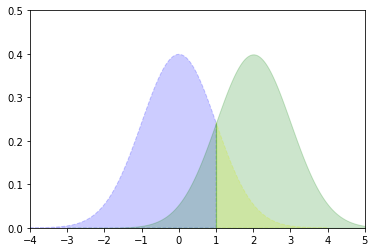

In [9]:
th=1
dist1 = stats.norm(0, 1)
dist2 = stats.norm(2, 1)

#x11=np.linspace(dist1.ppf(0.001), dist1.ppf(0.75), 100)
#x12=np.linspace(dist1.ppf(0.75), dist1.ppf(0.999), 100)
x11=np.linspace(-4, 1, 100)
x12=np.linspace(1, 4, 100)
y11=dist1.pdf(x11)
y12=dist1.pdf(x12)

#x21=np.linspace(dist2.ppf(0.001), dist2.ppf(0.75), 100)
#x22=np.linspace(dist2.ppf(0.75), dist2.ppf(0.999), 100)
x21=np.linspace(-3, 1, 100)
x22=np.linspace(1, 5, 100)
y21=dist2.pdf(x21)
y22=dist2.pdf(x22)

plt.stackplot(x11, y11, color='b', linestyle='--', alpha=0.2)
plt.stackplot(x12, y12, color='yellow', linestyle='--', alpha=0.2)
plt.stackplot(x21, y21, color='g', alpha=0.2)
plt.stackplot(x22, y22, color='g', alpha=0.2)
#plt.stackplot(x1, y1, y2, alpha=0.2, baseline='zero')
plt.axis([-4, 5, 0, .5])

## Multiclass metrics
- **macro**: simply calculates the mean of the binary metrics, giving equal weight to each class.
- **weighted**: compute the average of binary metrics in which each class's score is weighted by its presence (ratio) in the true data sample.
- **micro**: give each sample-class pair an equal contribution to the overall metric.

## Distance or similarity
- Euclidean distance, this is well known metric between two points in multi-dimensional space. Straight line between two points in Euclidean space. L2 norm
$$\sqrt{\sum_i (x_i-y_i)^2}$$
- Manhanttan distance, distance between two points follow a grid path (like streets in Manhattan), L1 norm
$$\sum_i |x_i-y_i|$$
- Mahalanobis distance. measure the distancerelative to the centroid in multivariate data (not circular/spherical, but elliptical)
$$\sqrt{(X_A-X_B)^T * Cov^{-1} * (X_A-X_B)}$$, 
where C is sample covariance matrix. Distance normalized by covariance matrix
- Cosine similarity, cosine of the angle between two vectors. the smaller the angle, the larger similarity. value between [-1, 1], independent of their magnitude.
$$\cos(\theta) = \frac{<A, B>}{|A|_2|B|_2}=\frac{\sum_i a_ib_i}{\sqrt{\sum_i a_i^2}\sqrt{\sum_i b_i^2}}$$
- Jaccard similarity, on set. the ratio of intersection set size over union set size
$$J(A,B)=\frac{|A\cap B|}{|A\cup B|}$$

In [3]:
np.cos(np.pi*np.array([0,0.5,1,1.5,2]))

array([ 1.0000000e+00,  6.1232340e-17, -1.0000000e+00, -1.8369702e-16,
        1.0000000e+00])

## Discrimitive vs. Generative methods
The goal is to estimate $P(y|X)$
### generative methods
Assume functional form of $P(X|y)$ and $P(y)$, estimate $P(X, y)$ first. Then using Bayes rule,
$$P(y|X) = \frac{P(X,|y)P(X)}{P(X)}$$
### discrimitive methods
Assum functional form of $P(y|X)$, estimate $P(y|X)$ directly from training data.

Key take aways
- The generative model does indeed have a higher asymptotic error (as the number of training examples become large) than the discriminative model. This means generally, discrimitive methods perform better than generative classifiers if we have many data. Because it make less assumption on data model. We can estimate statistics rather reliably if have enough data.
- The generative model may approach its asymptotic error much faster than the discriminative model – possibly with a number of training examples that is only logarithmic, rather than linear, in the number of parameters. This means generative models may perform better when we have small data and model assumption is corret.
- 